# Zillow Single Family Property Preditor
by Meredith Wang July-24-2022


<a href="#"><img align="left" alt="Python" src="https://img.shields.io/badge/Python-013243.svg?logo=python&logoColor=white"></a>
<a href="#"><img align="left" alt="Pandas" src="https://img.shields.io/badge/Pandas-150458.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="NumPy" src="https://img.shields.io/badge/Numpy-2a4d69.svg?logo=numpy&logoColor=white"></a>
<a href="#"><img align="left" alt="Matplotlib" src="https://img.shields.io/badge/Matplotlib-8DF9C1.svg?logo=matplotlib&logoColor=white"></a>
<a href="#"><img align="left" alt="seaborn" src="https://img.shields.io/badge/seaborn-65A9A8.svg?logo=pandas&logoColor=white"></a>
<a href="#"><img align="left" alt="plotly" src="https://img.shields.io/badge/plotly-adcbe3.svg?logo=plotly&logoColor=white"></a>
<a href="#"><img align="left" alt="sklearn" src="https://img.shields.io/badge/sklearn-4b86b4.svg?logo=scikitlearn&logoColor=white"></a>
<a href="#"><img align="left" alt="SciPy" src="https://img.shields.io/badge/SciPy-1560bd.svg?logo=scipy&logoColor=white"></a>

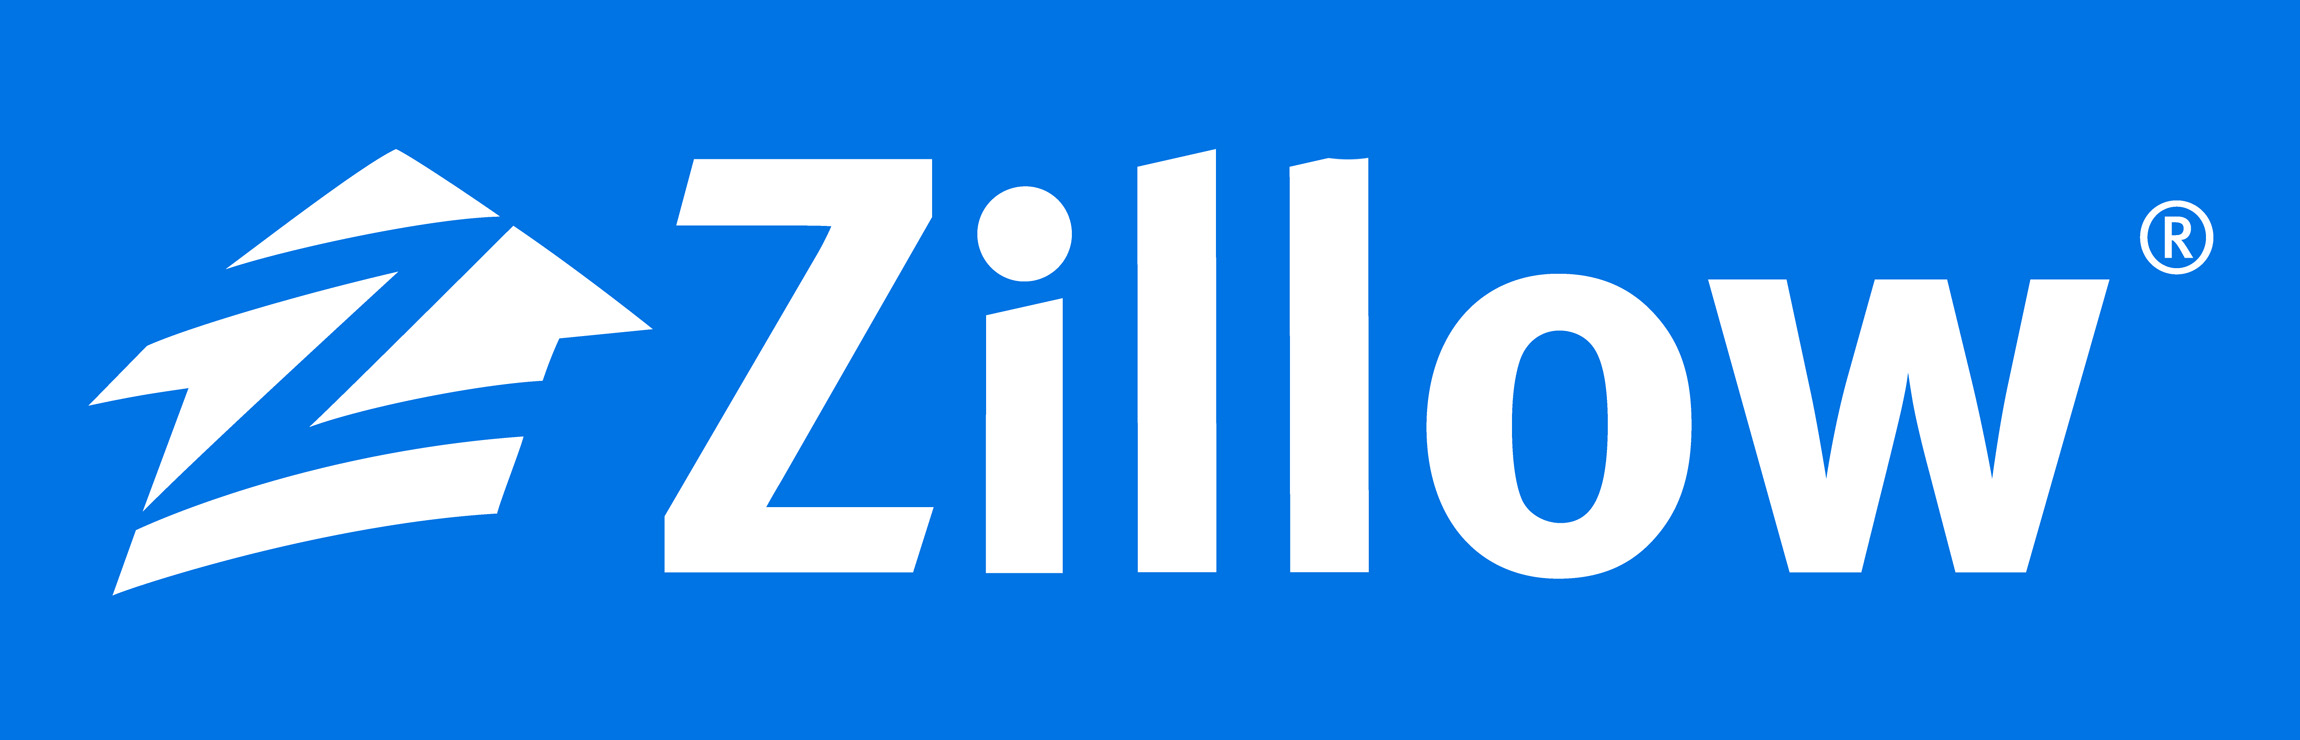

# 🏘️ Project Goal

# 📃 Project Description

# 📝 Initial Questions

# 📚 Data Dictionary

**Variable** |    **Value**    | **Meaning**
---|---|---
<span style="background-color: #ffe0bd">Latitude</span> | Float number| Latitude of the middle of the parcel
<span style="background-color: #ffe0bd">Longitude</span> | Float number | Longitude of the middle of the parcel
<span style="background-color: #ffe0bd">Bedrooms</span> | Integer ranging from 1-6 | Number of bedrooms in home
<span style="background-color: #ffe0bd">Bathrooms</span>| Float ranging from 0.5-6.5 | Number of bathrooms in home including fractional bathrooms
<span style="background-color: #ffe0bd">Square Feet</span>| Float number| Calculated total finished living area of the home
<span style="background-color: #ffe0bd">Lot Size</span> | Float number | Area of the lot in square feet
<span style="background-color: #ffe0bd">Age</span> | Integer | This indicate the age of the property in 2017, calculated using the year the principal residence was built
<span style="background-color: #ffe0bd">Assessed Value</span> | Float number | The total tax assessed value of the parcel
<span style="background-color: #ffe0bd">Tax Amount</span> | Float number | The total property tax assessed for that assessment year
<span style="background-color: #ffe0bd">County</span> | 1) Ventura 2) Los Angeles 3) Orange | County in which the property is located
<span style="background-color: #ffe0bd">Bedrooms Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bedrooms; Medium: 3-4 bedrooms; Large: 5-6 bedrooms
<span style="background-color: #ffe0bd">Bathroom Size</span> | 1) Small 2) Medium 3) large | Small: 1-2 bathrooms; Medium: 3-4 bathrooms; Large: 5-6 bathrooms

# 🧮 Wrangle Zillow Data

## 1. Data Acquisition
First, I stored the sensitive data in an **env.py** file in order to get conncetion to the mySQL server and abtain our data.

To acquire the zillow data for singel family properties, I used the **zillow** database in the mySQL server, and joined the following tables to gather data: <samp>`properties_2017, predictions_2017, propertylandusetype`</samp>

Create **acquire.py** and user-defined function `get_zillow_data()` to acquire and cache data.

In [1]:
# Import essential libraries
from imports import *

# Calling the function to make the connection to database, run the query, and store the table in the form of a dataframe
messy_df = acquire.get_zillow_data()

# Check the shape of our messy dataframe
messy_df.shape

(52441, 11)

## 2. Data Preparation - Data Cleaning 🧹 

▪️ **Missing Values**:
- `has_pool` null values are replaced with 0
    
- All other null values are dropped

▪️ **Data Types: float is converted to the int datatype** (`age`)

▪️ **Data Mapping:**
- Created new column `county` corresponding to `fips_code`
- Created new column `bedrooms_size`, `bathrooms_size` corresponding to `bedrooms`, `bathrooms` value

▪️ **Dummy variables: created dummy variables for binary and non-binary categorical variables**

▪️ **Outliers:**
- Upper bound: Q3 + 1.5 * IQR
- Lower bund: Q1 - 1.5 * IQR

In [3]:
# Cleaning the data using function from prepare.py
df = prepare.prep_zillow(messy_df)

# Checking the shape of our cleaned dataframe
df.shape

(49633, 23)

## 3. Data Preparation - Splitting Data 🗂

In [5]:
# Split the data into train, validate, test using user-defined function from prepare.py
train, validate, test = prepare.split(df)

# Checking the size of each dataset
train.shape, validate.shape, test.shape

((27794, 23), (11912, 23), (9927, 23))

# 📊 Data Context

We have data of **49633** single family properties. **5** categorical variables and **4** numerical variables.

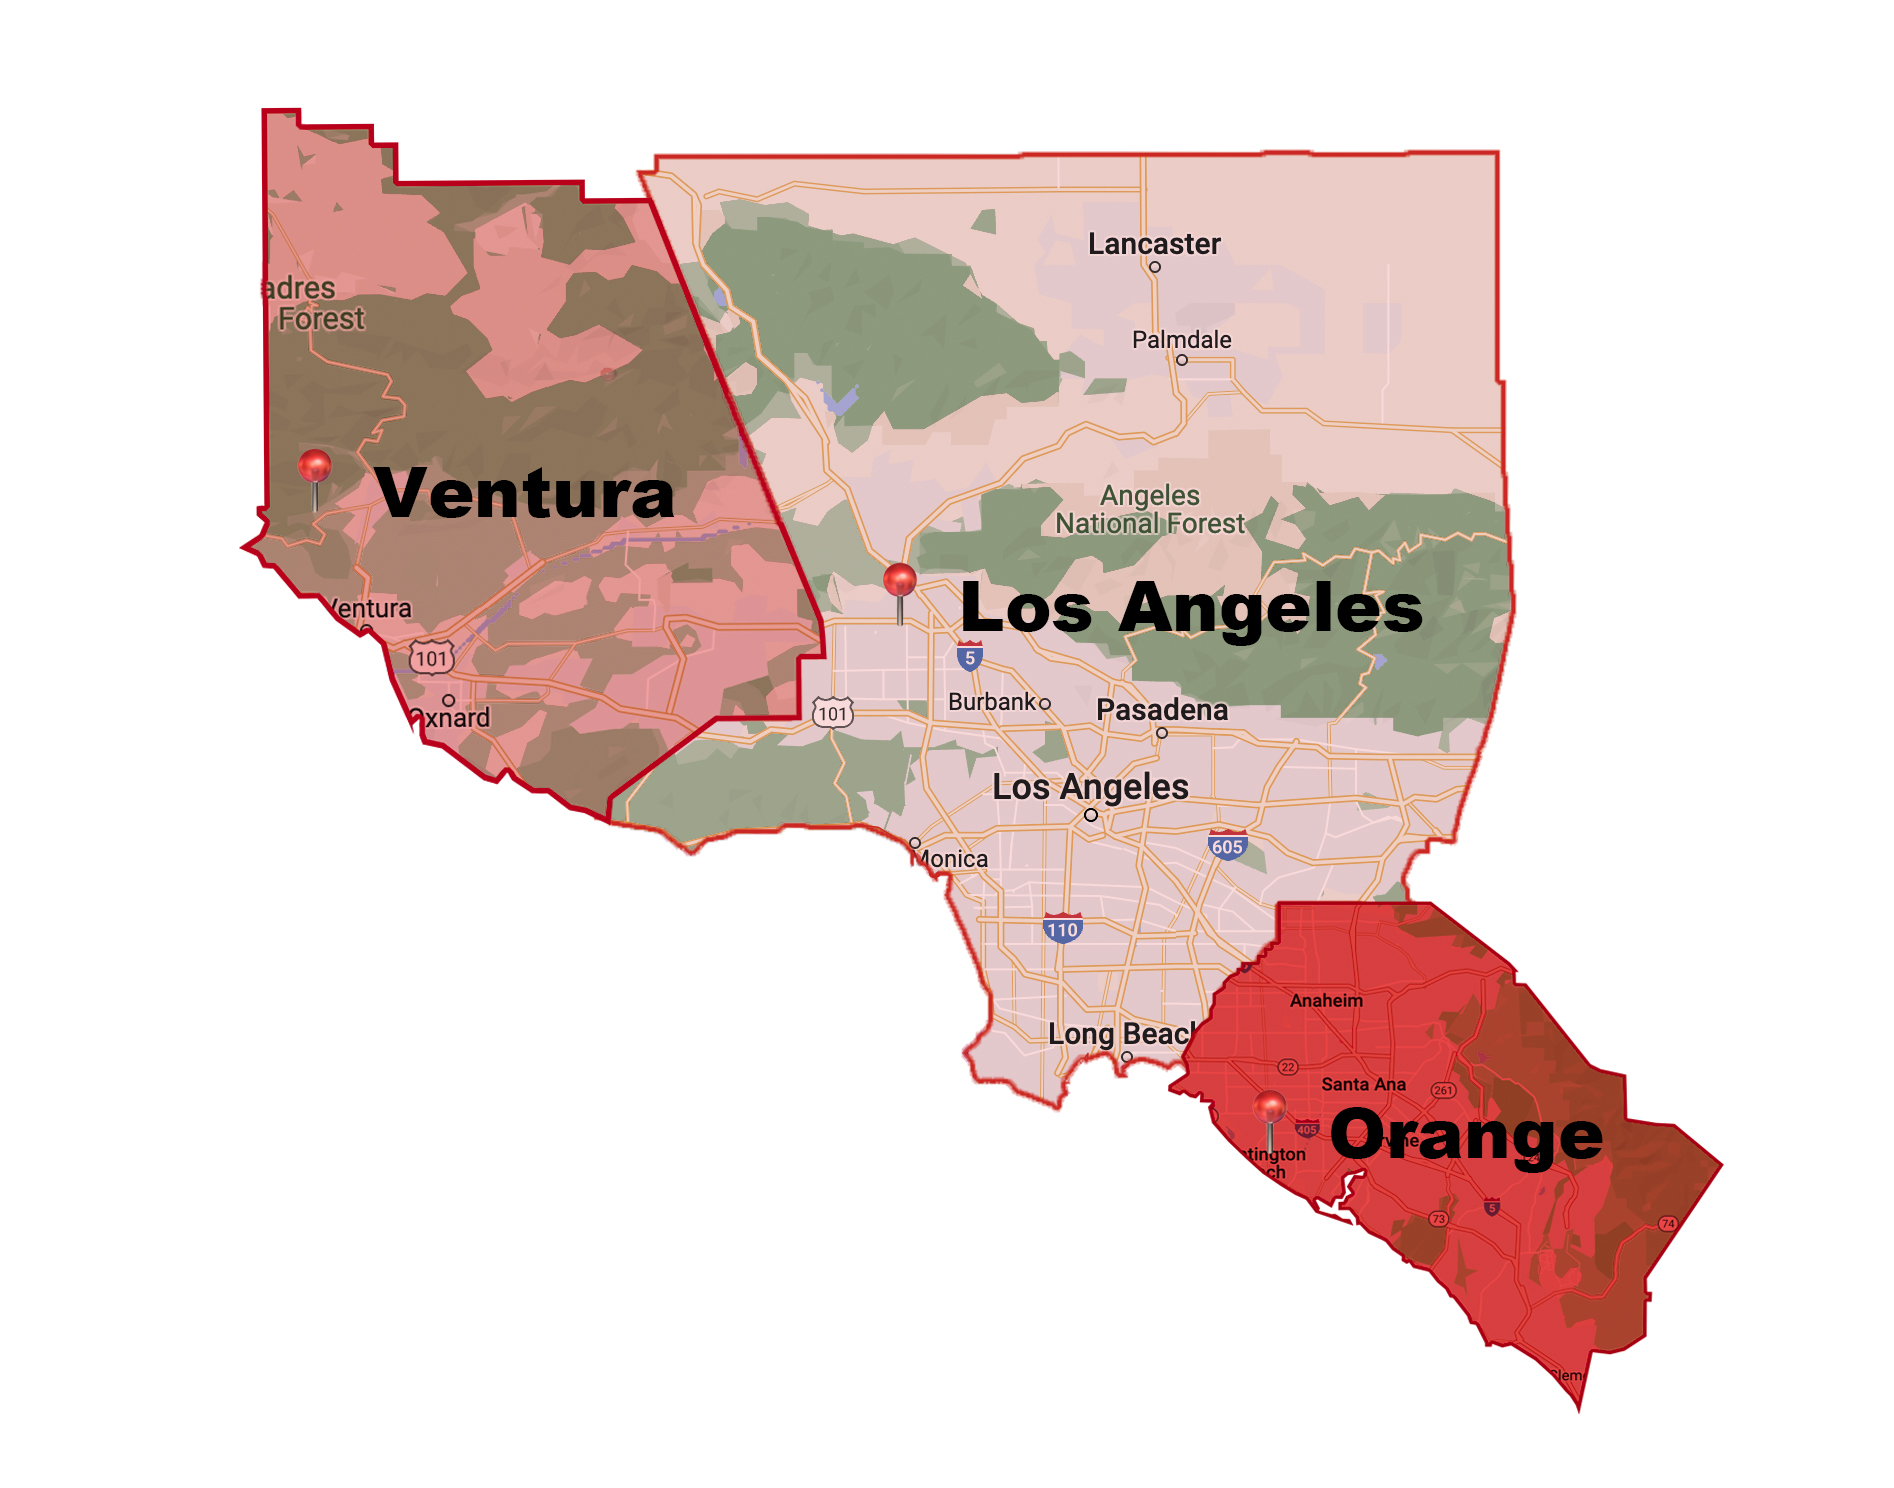

# 👩🏻‍💻 Exploratory Analysis

> ## Question 1. What associated with `assessed_value` the most?

<AxesSubplot:>

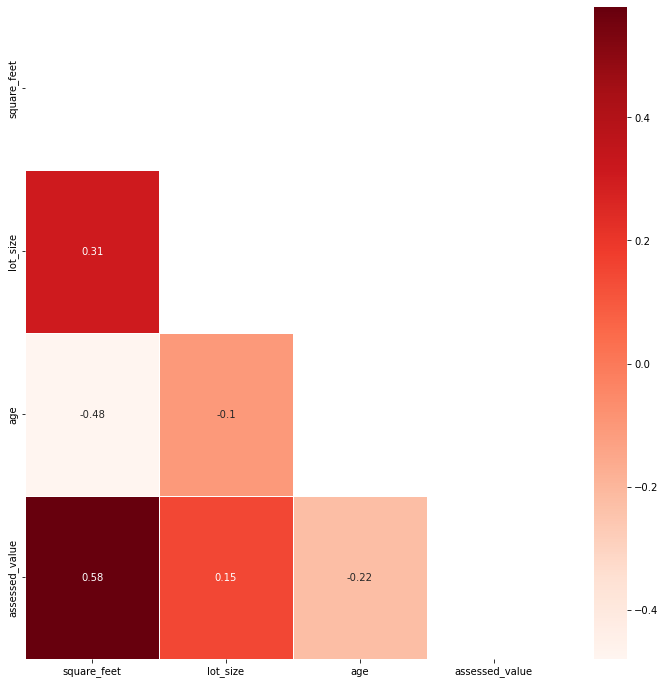

In [9]:
# Input continuous features
continuous_cols = ['square_feet', 'lot_size', 'age', 'assessed_value']

# Calcualte correlation between features
train_corr = train[continuous_cols].corr()

# Visualize correlaiton
plt.figure(figsize = (12,12))
sns.heatmap(train_corr,cmap='Reds', annot=True, linewidth=0.5, mask= np.triu(train_corr))

Text(0.5, 1.0, 'Assessed Value by Square Feet')

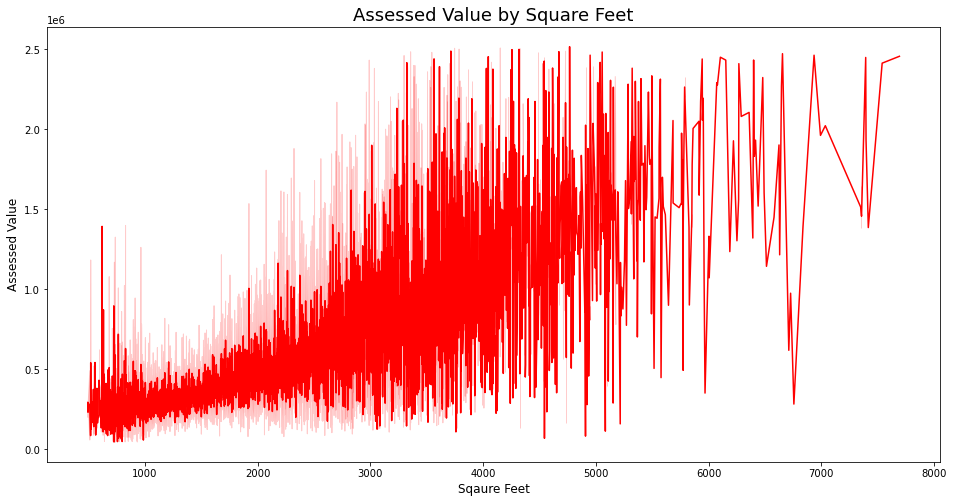

In [8]:
# Visualizing how square feet is correlated with assessed value
plt.figure(figsize = (16,8))
sns.lineplot(x = train.square_feet, y = train.assessed_value, color = 'red', data = train)
plt.xlabel('Sqaure Feet', fontsize = 12)
plt.ylabel('Assessed Value', fontsize = 12)
plt.title('Assessed Value by Square Feet', fontsize = 18)

> ## Answer 1:
**square_feet** has strong positive (0.58) correlation with **assessed_value**

***

> ## ❓Question 2. Is `assessed_value` significantly different across 3 different counties?

# 🧪 Modeling

## Baseline Prediction

> ## PROJECT GOAL